# Preparation

## Import relevant libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pathlib
import pandas as pd

from community_detection.data_preprocessing import load_starwars_graph
from community_detection.algorithms import girvan_newman_detection, infomap_community_detection

## Load Star-Wars graph

In [2]:
G = load_starwars_graph()

Name: Star-Wars
Type: Graph
Number of nodes: 110
Number of edges: 398
Average degree:   7.2364


# Girvan-Newman

## Model Implementation

Weighted Girvan-Newman Community Detection
------------------------------------------
Number of communities detected: 6
Number of nodes not in any community: 1


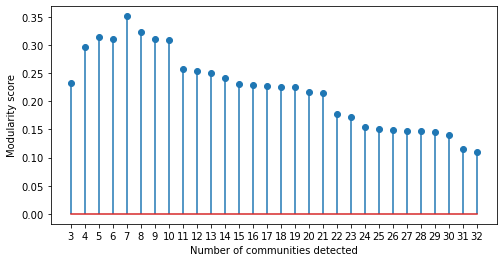

The image was saved to: `output/modularity_plot_Star-Wars.png`


In [3]:
gn_communities = girvan_newman_detection(G)

## Visualization

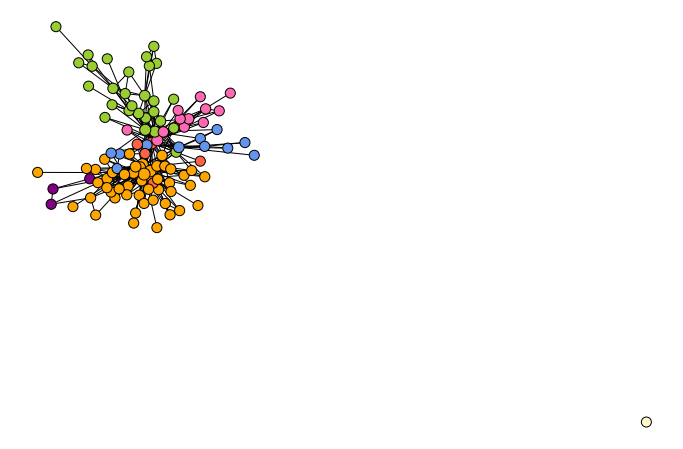

In [4]:
# plot decoration
plt.figure(figsize=(12, 8)) 

# map the color of each node with its community
colors = ['orange', 'purple', 'tomato', 'cornflowerblue', 'yellowgreen',
      'hotpink', 'lemonchiffon', 'firebrick', 'mediumblue', 'mediumorchid', 'rosybrown', 'linen']
color_map = []
# loop over nodes in G
for node in G.nodes:
    color_map.append(colors[gn_communities[node]])

# position map
pos = nx.spring_layout(G)

# edges
nx.draw_networkx_edges(G, pos)

# nodes
node_collection = nx.draw_networkx_nodes(
G, pos=pos, node_color = color_map, edgecolors= 'black',
node_size = [v+1 * 100 for v in dict(G.degree).values()])

plt.axis('off')
pathlib.Path("output").mkdir(exist_ok=True)
plt.savefig("output/girvan_newman_community_plot.png")

# Infomap

## Model Implementation

In [5]:
im_communities = infomap_community_detection(G)

Infomap Community Detection
---------------------------
Number of communities detected: 10
Number of nodes not in any community: 1


## Visualization

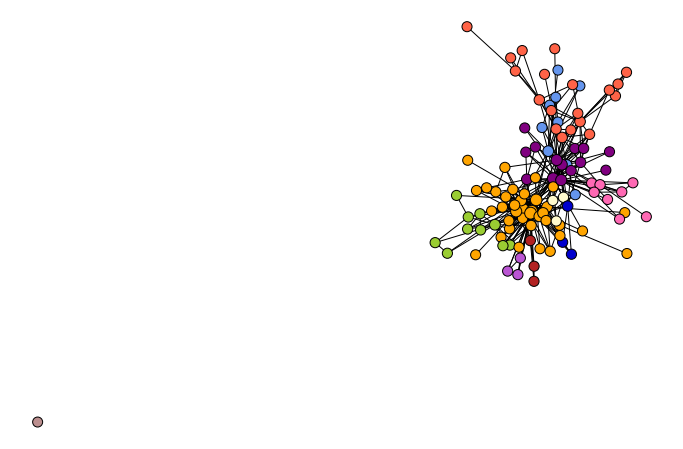

In [6]:
# plot decoration
plt.figure(figsize=(12, 8)) 

# map the color of each node with its community
colors = ['black', 'orange', 'purple', 'tomato', 'cornflowerblue', 'yellowgreen',
      'hotpink', 'lemonchiffon', 'firebrick', 'mediumblue', 'mediumorchid', 'rosybrown', 'linen']
color_map = []
# loop over nodes in G
for node in G.nodes:
    color_map.append(colors[im_communities[node]])

# position map
pos = nx.spring_layout(G)

# edges
nx.draw_networkx_edges(G, pos)

# nodes
node_collection = nx.draw_networkx_nodes(
G, pos=pos, node_color = color_map, edgecolors= 'black',
node_size = [v+1 * 100 for v in dict(G.degree).values()])

plt.axis('off')
pathlib.Path("output").mkdir(exist_ok=True)
plt.savefig("output/infomap.png")

# Evaluation: Compare & Contrast